In [5]:
import numpy as np
import matplotlib.pyplot as plt
import machine_cffi

In [6]:
t = 0.0
theta = 358
phi_d = 10.0
phi_q = 5.0

machine_cffi.lib.Flux2Te(t,theta,phi_d,phi_q)

77.0299

In [23]:
Dt = 50e-6
times = np.arange(0,1,Dt)
N_t = len(times)

N_pp = 4
omega_m = 1;
R_s = 0.02
outputs = {'v_d':np.zeros(N_t),'v_q':np.zeros(N_t),
           'i_d':np.zeros(N_t),'i_q':np.zeros(N_t)}
phi_d = 0
phi_q = 0
for it,t in enumerate(times):

    v_d = i_d/10
    v_q = i_q/10

    if t>1.0:
        v_d = 0
        v_q = 0

    i_d = machine_cffi.lib.Flux2id(t,theta,phi_d,phi_q)
    i_q = machine_cffi.lib.Flux2iq(t,theta,phi_d,phi_q)
    tau_e = machine_cffi.lib.Flux2Te(t,theta,phi_d,phi_q)

    dphi_d = v_d - R_s*i_d + N_pp*omega_m*phi_d
    dphi_q = v_q - R_s*i_q - N_pp*omega_m*phi_q

    phi_d += Dt*dphi_d
    phi_q += Dt*dphi_q

    outputs['v_d'][it] = v_d
    outputs['v_q'][it] = v_q
    outputs['i_d'][it] = i_d
    outputs['i_q'][it] = i_q



Text(0, 0.5, 'Y Axis')

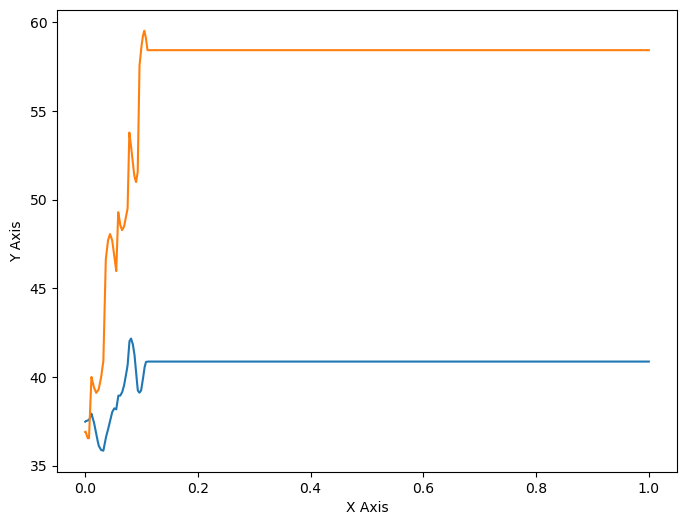

In [ ]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

# Plot surface
ax.plot(times,outputs['i_d'])
ax.plot(times,outputs['i_q'])

# Labels
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
